# Índice de contenidos
1. Antes de empezar:

2. Reto 1 - Importar y describir el conjunto de datos

    2.0.0.1 Explore el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentra?

3. Reto 2 - Limpieza y transformación de datos

4. Reto 3 - Preprocesamiento de datos

    4.0.0.1 Utilizaremos el StandardScaler de sklearn.preprocessing y escalaremos nuestros datos. Lea más sobre StandardScaler aquí.

5. Reto 4 - Agrupación de datos con K-Means

6. Reto 5 - Agrupación de datos con DBSCAN

7. Reto 6 - Comparar K-Means con DBSCAN

8. Reto adicional 2 - Cambiar el número de clusters de K-Means

9. Bonus Challenge 3 - Cambiar DBSCAN eps y min_samples

# Antes de empezar:
- Lee el archivo README.md
- Comenta todo lo que puedas y utiliza los recursos del archivo README.md
- ¡Feliz aprendizaje!

In [59]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Desafío 1 - Importar y describir el conjunto de datos

En este laboratorio, utilizaremos un conjunto de datos que contiene información sobre las preferencias de los clientes. Analizaremos cuánto gasta cada cliente en un año en cada subcategoría de la tienda de comestibles e intentaremos encontrar similitudes mediante la agrupación.

El origen del conjunto de datos es [aquí](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [60]:
df = pd.read_csv('/home/ubuntu/Ironhack_all/Ironhack_26thLab_Unsupervised_learning/your-code/Wholesale customers data.csv')

#### Explora el conjunto de datos con técnicas matemáticas y de visualización. ¿Qué encuentras?

Lista de comprobación:

* ¿Qué significa cada columna?
* ¿Hay datos categóricos que convertir?
* ¿Hay que eliminar datos que faltan?
* Colinealidad de columnas: ¿hay correlaciones altas?
* Estadísticas descriptivas: ¿hay que eliminar algún valor atípico?
* Distribución de los datos por columnas: ¿está sesgada la distribución?
* Etc.

Información adicional: Hace más de un siglo, un economista italiano llamado Vilfredo Pareto descubrió que aproximadamente el 20% de los clientes representan el 80% de las ventas minoristas típicas. Esto se denomina [principio de Pareto](https://en.wikipedia.org/wiki/Pareto_principle). Compruebe si este conjunto de datos presenta esta característica.

In [61]:
# Your code here:

df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [112]:
print(df['Channel'].unique())

df['Channel'].value_counts()
# Channel 1 is HORECA
# Channel 2 is Retail

[2 1]


Channel
1    298
2    142
Name: count, dtype: int64

In [113]:
print(df['Region'].unique())

df['Region'].value_counts()

# Region 1 is Lisbon
# Region 2 is Oporto
# Region 3 is Other region

[3 1 2]


Region
3    316
1     77
2     47
Name: count, dtype: int64

In [62]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


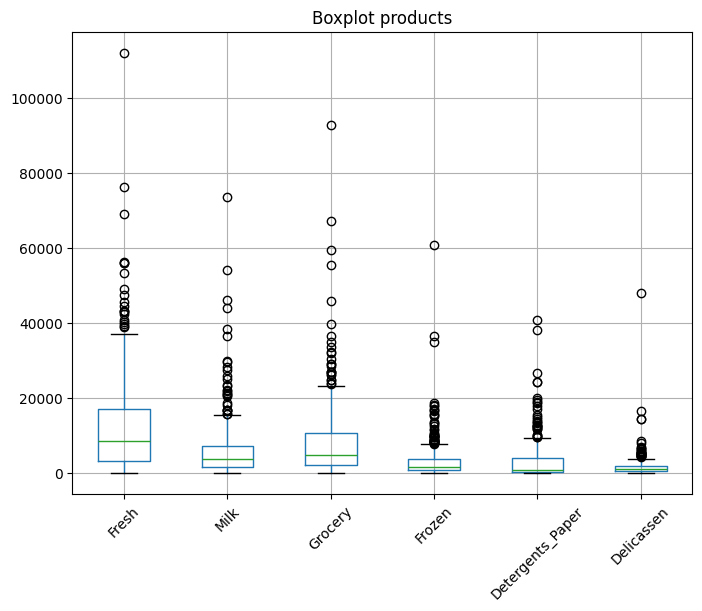

In [63]:
plt.figure(figsize=(8,6))
df.boxplot(column=['Fresh', 'Milk', 'Grocery', 
                          'Frozen','Detergents_Paper', 'Delicassen'])
plt.xticks(rotation=45)
plt.title('Boxplot products')
plt.show()

<Axes: >

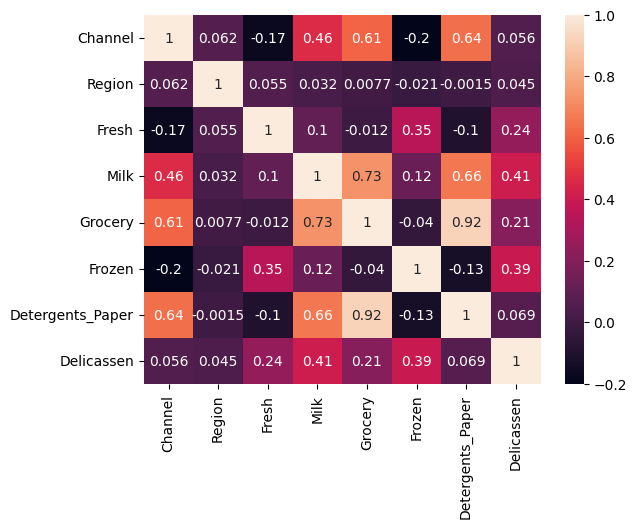

In [64]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

In [65]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


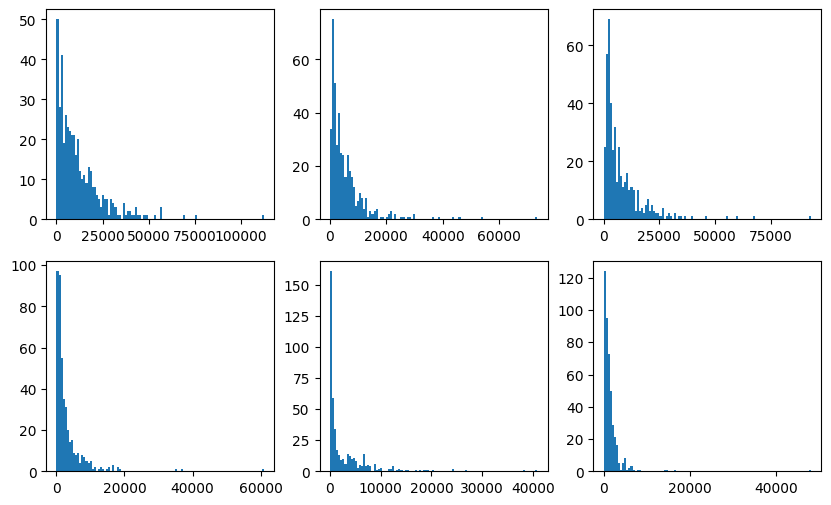

In [66]:
# Pareto

columns_to_plot = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

fig, axis = plt.subplots(2,3,figsize=(10,6))
axis = axis.flatten()

for i, column in enumerate(columns_to_plot):
        axis[i].hist(df[column], bins=100)
plt.show()

In [67]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [93]:
# For pareto I'll assume that each row is a client:

sales_by_index =  df.groupby(df.index)['Fresh'].sum()
total_sales = df['Fresh'].sum()
sales_sorted = sales_by_index.sort_values(ascending=False).reset_index()

sales_sorted['Cumulative sum'] = np.cumsum(sales_sorted['Fresh'])
sales_sorted['Percentage'] = sales_sorted['Cumulative sum'] / total_sales

Row_80_Fresh = sales_sorted[sales_sorted['Percentage'] >= 0.8].head(1)

print(f'The % of people that represent 80% of sales data is {Row_80_Fresh.index[0] / len(sales_by_index)}')


The % of people that represent 80% of sales data is 0.4318181818181818


In [94]:
sales_by_index =  df.groupby(df.index)['Milk'].sum()
total_sales = df['Milk'].sum()
sales_sorted = sales_by_index.sort_values(ascending=False).reset_index()

sales_sorted['Cumulative sum'] = np.cumsum(sales_sorted['Milk'])
sales_sorted['Percentage'] = sales_sorted['Cumulative sum'] / total_sales

Row_80_Milk = sales_sorted[sales_sorted['Percentage'] >= 0.8].head(1)
print(f'The % of people that represent 80% of sales data is {Row_80_Milk.index[0] / len(sales_by_index)}')

The % of people that represent 80% of sales data is 0.42272727272727273


In [97]:
sales_by_index =  df.groupby(df.index)['Grocery'].sum()
total_sales = df['Grocery'].sum()
sales_sorted = sales_by_index.sort_values(ascending=False).reset_index()

sales_sorted['Cumulative sum'] = np.cumsum(sales_sorted['Grocery'])
sales_sorted['Percentage'] = sales_sorted['Cumulative sum'] / total_sales

Row_80_Grocery = sales_sorted[sales_sorted['Percentage'] >= 0.8].head(1)
print(f'The % of people that represent 80% of sales data is {Row_80_Grocery.index[0] / len(sales_by_index)}')

The % of people that represent 80% of sales data is 0.4159090909090909


**Tus observaciones aquí**

+ High correlation between Detergents_Paper and Groceries
+ Pareto does not seem to hold, I think we got 40% people representing 80% of sales data instead.




# Reto 2 - Limpieza y transformación de datos

Si tu conclusión del reto anterior es que los datos necesitan limpieza/transformación, hazlo en las celdas de abajo. Sin embargo, si su conclusión es que los datos no necesitan ser limpiados o transformados, no dudes en saltarte este reto. Si optas por esta última opción, explica los motivos.

In [69]:
# Your code here


**Tus observaciones aquí**

+ Parece que...
+ 
+ 

# Reto 3 - Preprocesamiento de datos

Uno de los problemas del conjunto de datos es que los rangos de valores son notablemente diferentes en las distintas categorías (por ejemplo, `Fresh` y `Grocery` en comparación con `Detergents_Paper` y `Delicassen`). Si hiciste esta observación en el primer reto, ¡has hecho un gran trabajo! Esto significa que no sólo has completado las preguntas de bonificación en el anterior laboratorio de Aprendizaje Supervisado, sino que también has investigado en profundidad sobre [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). ¡Sigue trabajando así de bien!

Diversos rangos de valores en diferentes características podrían causar problemas en nuestra agrupación. La forma de reducir el problema es mediante el escalado de características. Volveremos a utilizar esta técnica con este conjunto de datos.

#### Utilizaremos el `StandardScaler` de `sklearn.preprocessing` y escalaremos nuestros datos. Lee más sobre `StandardScaler` [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*Después de escalar tus datos, asigna los datos transformados a una nueva variable `customers_scale`.

In [70]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:



# Reto 4 - Agrupación de datos con K-Means

Ahora vamos a agrupar los datos con K-Means primero. Inicia el modelo K-Means, luego ajusta tus datos escalados. En los datos devueltos por el método `.fit`, hay un atributo llamado `labels_` que es el número de cluster asignado a cada registro de datos. Lo que puede hacer es asignar estas etiquetas de nuevo a `customers` en una nueva columna llamada `customers['labels']`. Entonces verá los resultados de cluster de los datos originales.

In [116]:
from sklearn.cluster import KMeans

# Your code here:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale = scaler.fit_transform(df)


### Viendo el elbow pododríamos escoger 2 como el número de clusters correctos

In [130]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)
labels = kmeans_2.predict(customers_scale)
# clusters = kmeans_2.labels_.tolist()

df['labels'] = labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels
0,2,3,12669,9656,7561,214,2674,1338,0,1
1,2,3,7057,9810,9568,1762,3293,1776,0,1
2,2,3,6353,8808,7684,2405,3516,7844,0,1
3,1,3,13265,1196,4221,6404,507,1788,1,0
4,2,3,22615,5410,7198,3915,1777,5185,0,1


In [131]:
df['labels'].value_counts()

labels
0    306
1    134
Name: count, dtype: int64

Cuenta los valores en `labels`.

# Reto 5 - Clustering de datos con DBSCAN

Ahora vamos a agrupar los datos utilizando DBSCAN. Utiliza `DBSCAN(eps=0.5)` para iniciar el modelo y, a continuación, ajusta los datos escalados. En los datos devueltos por el método `.fit`, asigna las `labels_` de nuevo a `customers['labels_DBSCAN']`. Ahora tus datos originales tienen dos etiquetas, una de K-Means y la otra de DBSCAN.

In [134]:
from sklearn.cluster import DBSCAN 

dbscan=DBSCAN().fit_predict(customers_scale)
df['labels_DBSCAN']=dbscan


Cuenta los valores en `labels_DBSCAN`.

In [135]:
# Your code here
df['labels_DBSCAN'].value_counts()


labels_DBSCAN
-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 3      5
 0      5
 7      5
Name: count, dtype: int64

# Reto 6 - Comparar K-Means con DBSCAN

Ahora queremos comparar visualmente cómo K-Means y DBSCAN han agrupado nuestros datos. Crearemos gráficos de dispersión para varias columnas. Para cada uno de los siguientes pares de columnas, traza un gráfico de dispersión utilizando `labels` y otro utilizando `labels_DBSCAN`. Ponlos uno al lado del otro para compararlos. ¿Qué algoritmo de agrupación tiene más sentido?

Columnas a visualizar:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualice `Detergentes_Papel` como X y `Leche` como Y mediante `labels` y `labels_DBSCAN` respectivamente

In [151]:
def plot(x,y,hue):
    sns.scatterplot(data=df,
                    x=x, 
                    y=y,
                    hue=hue)
    plt.title(f'{x} vs {y} ')
    return plt.show()

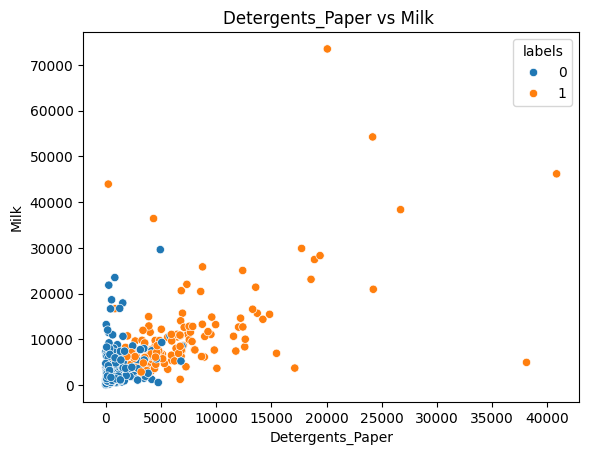

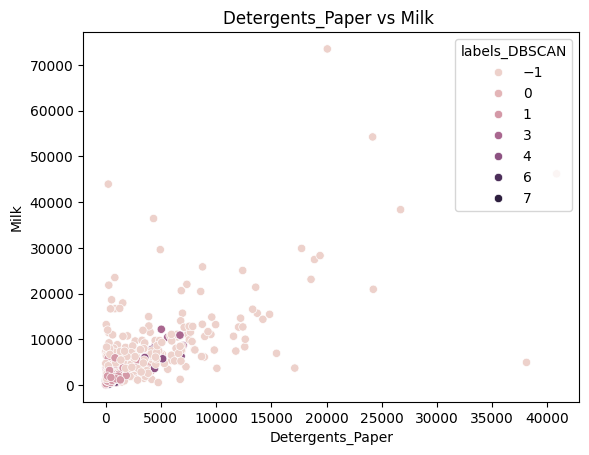

In [155]:
# Your code here:

plot('Detergents_Paper', 'Milk', 'labels')
plot('Detergents_Paper', 'Milk', 'labels_DBSCAN')


Visualice `Grocery` como X y `Fresh` como Y mediante `labels` y `labels_DBSCAN` respectivamente

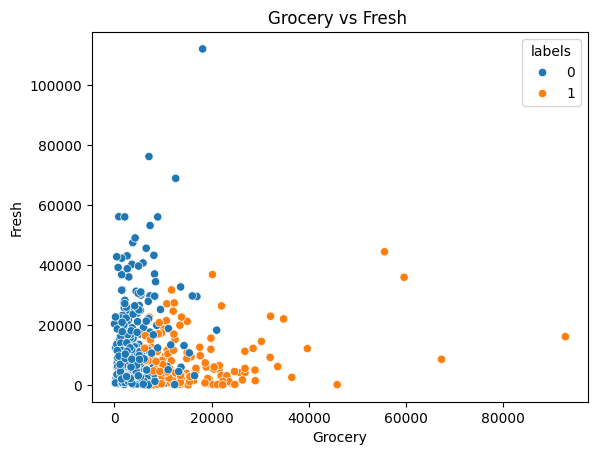

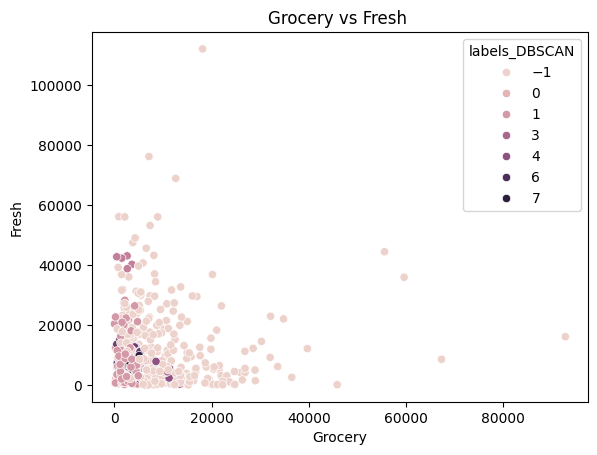

In [156]:
# Your code here:
plot('Grocery', 'Fresh', 'labels')
plot('Grocery', 'Fresh', 'labels_DBSCAN')

Visualice `Frozen` como X y `Delicassen` como Y mediante `labels` y `labels_DBSCAN` respectivamente

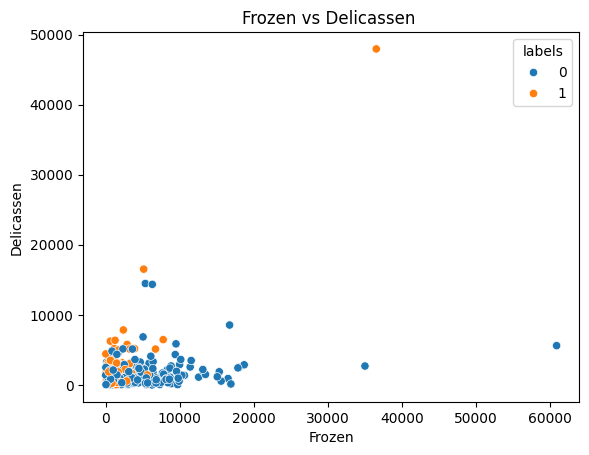

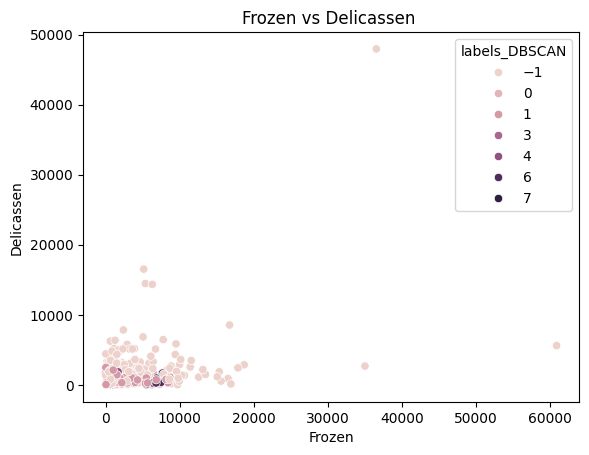

In [153]:
# Your code here:
plot('Frozen', 'Delicassen', 'labels')
plot('Frozen', 'Delicassen', 'labels_DBSCAN')

Vamos a utilizar un groupby para ver cómo la media difiere entre los grupos. Agrupamos `customers` por `labels` y `labels_DBSCAN` respectivamente y calculamos las medias de todas las columnas.

In [160]:
# Your code here:

df.groupby(['labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels
labels_DBSCAN,,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.541176,0.458824
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,0.000000,1.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,1.000000,0.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000,0.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,0.000000,1.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,0.000000,1.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000,0.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000,0.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,1.000000,0.000000


In [161]:
df.groupby(['labels_DBSCAN']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Label,labels
labels_DBSCAN,,,,,,,,,,
-1,1.490196,2.45098,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.541176,0.458824
0,2.000000,3.00000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,0.000000,1.000000
1,1.000000,3.00000,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,1.000000,0.000000
2,1.000000,3.00000,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,1.000000,0.000000
3,2.000000,3.00000,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,0.000000,1.000000
4,2.000000,3.00000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,0.000000,1.000000
5,1.000000,1.00000,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000,0.000000
6,1.000000,1.00000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000,0.000000
7,1.000000,2.00000,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,1.000000,0.000000


¿Qué algoritmo funciona mejor?

**Tus observaciones aquí**

Can't tell without doing additional analyses. Feels like K-Means is doing better when looking at the graph

# Bonus Challenge 2 - Cambiar el número de clusters de K-Means

Como hemos mencionado antes, no tenemos que preocuparnos por el número de clusters con DBSCAN porque lo decide automáticamente en función de los parámetros que le enviemos. Pero con K-Means, tenemos que suministrar el parámetro `n_clusters` (si no se suministra `n_clusters`, el algoritmo utilizará `8` por defecto). Debe saber que el número óptimo de clusters varía en función del conjunto de datos. K-Means puede funcionar mal si se utiliza un número incorrecto de clusters.

En el aprendizaje automático avanzado, los científicos de datos prueban diferentes números de clusters y evalúan los resultados con medidas estadísticas (leer [aquí](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). Hoy no vamos a utilizar medidas estadísticas, sino nuestros ojos. En las celdas de abajo, experimenta con distintos números de conglomerados y visualízalos con gráficos de dispersión. ¿Qué número de clusters parece funcionar mejor para K-Means?

In [ ]:
# Your code here


**Tus observaciones aquí**

* Viendo los gráficos del k-means ...

# Bonus Challenge 3 - Cambiar `eps` y `min_samples` de DBSCAN

Experimenta cambiando los parámetros `eps` y `min_samples` de DBSCAN. Mira cómo difieren los resultados con la visualización de gráficos de dispersión.

In [ ]:
# Your code here


**Tus observaciones aquí**

    + El DBscan ajustado...
    
